In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import umap
import umap.plot

import scipy
import scipy.sparse as sp_sparse
from scipy.sparse import csr_matrix
import scanpy as sc
import anndata

In [1]:
save_dir ='figures/'
results_dir = '../results_HECA/'
ref_dir = '../../data/HECA/'
ref_name = 'HECA'
ref_dataset_name = 'js'
ref_assignment_dataset_name = 'SEACell_assignments'
bulk_dataset_name = 'exp_metadata_cleaned_js'
bulk_split_suffix = ''

SHIFT = False
shift = '_shift' if SHIFT else ''
SWITCH = True
switch = '_switch' if SWITCH else ''
normalization = 'switch' if SWITCH else 'gene'
model = 'LogNorm'
DATE = '2024-06-27'
DATE2 = '2024-06-28'

In [3]:
# read reference data
ref_df = pd.read_csv(ref_dir + ref_dataset_name + '_' + normalization + '.csv', delimiter='\t', index_col=0).T
ref_df.head()


,aDC_HPCA_1,aDC_HPCA_2,aDC_HPCA_3,aDC_IRIS_1,aDC_IRIS_2,aDC_IRIS_3,Adipocytes_ENCODE_1,Adipocytes_ENCODE_2,Adipocytes_ENCODE_3,Adipocytes_FANTOM_1,...,Th2 cells_IRIS_3,Tregs_BLUEPRINT_1,Tregs_BLUEPRINT_2,Tregs_BLUEPRINT_3,Tregs_FANTOM_1,Tregs_FANTOM_2,Tregs_FANTOM_3,Tregs_HPCA_1,Tregs_HPCA_2,Tregs_HPCA_3
GSM6605437_CCTAACCAGTCAACAA-Huang,0.0,0.0,0.0,1.099324,2.081201,2.133759,0.835836,1.196897,1.393162,0.0,...,2.218713,1.296347,1.442165,1.814886,1.442165,1.814886,0.298333,0.0,0.0,0.0
UA_Endo12680033_GAGGCAATCTCTCGCA-Mareckova,0.0,0.0,0.0,1.051018,1.582302,1.291921,0.000000,0.514652,0.711706,0.0,...,0.339624,0.675883,0.000000,0.946236,0.000000,0.946236,0.235420,0.0,0.0,0.0
GSM6605436_CTCCCAAGTTCGGGTC-Huang,0.0,0.0,0.0,1.089004,1.249637,1.203338,0.000000,0.602674,0.676509,0.0,...,0.473721,0.269628,0.000000,0.377480,0.000000,0.377480,0.217690,0.0,0.0,0.0
GSM4577309_AAAGTGACATAATCCG-Wang,0.0,0.0,0.0,1.073690,1.109489,1.357200,0.000000,0.561194,0.000000,0.0,...,0.346379,0.544213,0.000000,0.389835,0.000000,0.389835,0.512468,0.0,0.0,0.0
GSM5572240_CTGCATCCAAGTATCC-Lai,0.0,0.0,0.0,1.517958,1.752767,1.911152,0.541875,0.928575,1.176641,0.0,...,1.361079,0.889473,0.437023,1.021154,0.437023,1.021154,0.207011,0.0,0.0,0.0


In [4]:
# read cluster assignment
ref_assign_df = pd.read_csv(ref_dir + ref_assignment_dataset_name + '_' + normalization + '.csv', delimiter="\t", index_col=0)
ref_assign_df.head()

,SEACell
index,
GSM6605437_CCTAACCAGTCAACAA-Huang,SEACell-4
UA_Endo12680033_GAGGCAATCTCTCGCA-Mareckova,SEACell-5
GSM6605436_CTCCCAAGTTCGGGTC-Huang,SEACell-9
GSM4577309_AAAGTGACATAATCCG-Wang,SEACell-5
GSM5572240_CTGCATCCAAGTATCC-Lai,SEACell-0


In [5]:
clusters_mean = ref_df.groupby(ref_assign_df['SEACell']).mean()
clusters_std = ref_df.groupby(ref_assign_df['SEACell']).std()
clusters_mean.head()

,aDC_HPCA_1,aDC_HPCA_2,aDC_HPCA_3,aDC_IRIS_1,aDC_IRIS_2,aDC_IRIS_3,Adipocytes_ENCODE_1,Adipocytes_ENCODE_2,Adipocytes_ENCODE_3,Adipocytes_FANTOM_1,...,Th2 cells_IRIS_3,Tregs_BLUEPRINT_1,Tregs_BLUEPRINT_2,Tregs_BLUEPRINT_3,Tregs_FANTOM_1,Tregs_FANTOM_2,Tregs_FANTOM_3,Tregs_HPCA_1,Tregs_HPCA_2,Tregs_HPCA_3
SEACell,,,,,,,,,,,,,,,,,,,,,
SEACell-0,0.049203,0.042341,0.042341,1.033210,1.408251,1.520859,0.816273,1.202988,1.381120,0.073544,...,1.252260,0.855697,0.728110,0.974048,0.728110,0.974048,0.381243,0.030862,0.029661,0.033434
SEACell-1,0.055633,0.103019,0.103019,0.860163,1.585365,1.638432,0.547283,0.934417,1.207002,0.038693,...,1.277391,0.752142,0.411657,0.843620,0.411657,0.843620,0.270753,0.020851,0.014678,0.023168
SEACell-10,0.030670,0.030144,0.030144,0.857344,1.332113,1.428544,0.449260,0.838935,0.820407,0.071216,...,1.412465,0.918224,0.578149,1.026528,0.578149,1.026528,0.380720,0.035493,0.036487,0.038977
SEACell-11,0.064257,0.053556,0.053556,1.033690,1.651822,1.783384,0.781291,1.198565,1.415105,0.089401,...,1.570389,0.964307,0.751491,1.090343,0.751491,1.090343,0.380217,0.039931,0.039143,0.042897
SEACell-12,0.088274,0.071963,0.071963,1.029059,1.276491,1.385366,0.366745,0.726333,0.924473,0.085350,...,1.115889,0.491705,0.347556,0.553860,0.347556,0.553860,0.235715,0.027456,0.017516,0.029685


In [6]:
# # plot UMAP
# mapper = umap.UMAP().fit(ref_df)
# umap.plot.points(mapper, labels=ref_assign_df['SEACell'])

In [7]:
# read cell fractions
cell_fractions = pd.read_csv(f'{results_dir}{bulk_dataset_name}{bulk_split_suffix}/{model}/cell_prob_{DATE}_js{switch}{shift}.csv', index_col=0)
cell_fractions

,0,1,2,3,4
SEACell,,,,,
SEACell-0,0.000001,9.827203e-07,0.000001,0.000002,0.000004
SEACell-1,0.000001,1.105992e-06,0.000001,0.000002,0.000004
SEACell-2,0.000004,4.101448e-06,0.000005,0.000006,0.000011
SEACell-3,0.000001,9.100299e-07,0.000001,0.000002,0.000003
SEACell-4,0.000004,2.561116e-06,0.000004,0.000007,0.000014
SEACell-5,0.000001,1.033209e-06,0.000001,0.000002,0.000004
SEACell-6,0.057087,4.148812e-02,0.027761,0.025013,0.016960
SEACell-7,0.000002,1.276894e-06,0.000002,0.000002,0.000004
SEACell-8,0.081500,5.108375e-02,0.069186,0.103594,0.105914


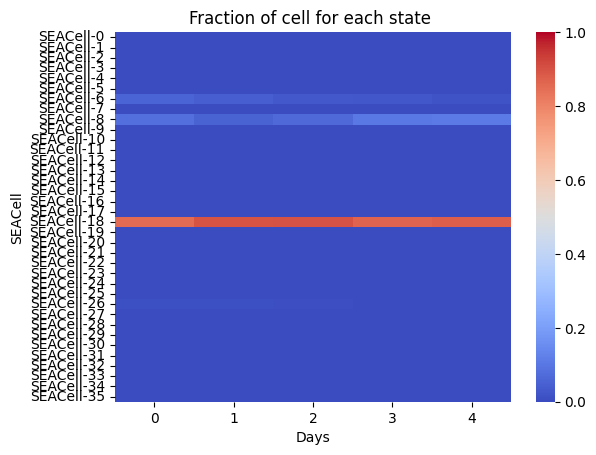

In [8]:
# plot heatmap
plt.clf()
ax = sns.heatmap(cell_fractions, cmap = 'coolwarm', linewidth=0, yticklabels=True, vmin=0, vmax=1)
ax.set_xlabel('Days')
ax.set_ylabel('SEACell')
plt.title("Fraction of cell for each state ")
title = f'{save_dir}cell_fraction_plot_{ref_name}_{model}{switch}{shift}{bulk_split_suffix}'
plt.savefig(title, dpi=300, bbox_inches="tight")

### Compare different age groups

In [15]:
# read cell fractions
suffixes = ["le29", "le35", "le40", "ge40"]
age_cell_fractions = {}
for suff in suffixes:
	age_cell_fractions[suff] = pd.read_csv(f'{results_dir}{bulk_dataset_name}_age{suff}/{model}/cell_prob_{DATE}_js{switch}{shift}.csv', index_col=0)
age_cell_fractions.keys()

dict_keys(['le29', 'le35', 'le40', 'ge40'])

In [16]:
# for each cell fraction, average days 1 to 3
age_cell_fractions_mean = {}
for suff in suffixes:
	age_cell_fractions_mean[suff] = age_cell_fractions[suff].iloc[:, 1:4].mean(axis=1)

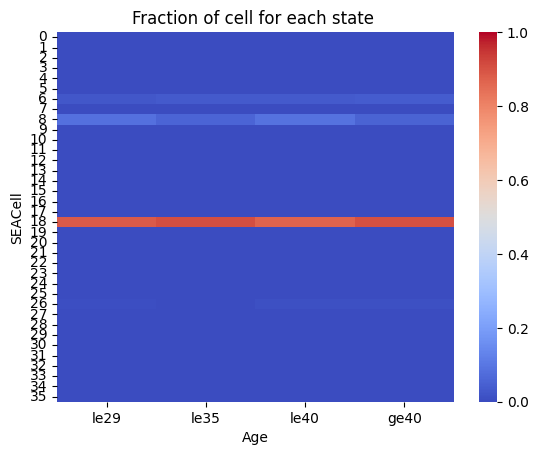

In [17]:
# plot heatmap with x axis as age
plt.clf()
cell_fractions = np.vstack([age_cell_fractions_mean[suff].values for suff in suffixes]).T
ax = sns.heatmap(cell_fractions, cmap = 'coolwarm', linewidth=0, yticklabels=True, vmin=0, vmax=1)
ax.set_xticklabels(suffixes)
ax.set_xlabel('Age')
ax.set_ylabel('SEACell')
plt.title("Fraction of cell for each state ")
title = f'{save_dir}cell_fraction_plot_age_{ref_name}_{model}{switch}{shift}'
plt.savefig(title, dpi=300, bbox_inches="tight")

In [18]:
age = np.array([0, 1, 2, 3])

# calculate correlation between age and cell fraction for each cell type
correlations = []
for i in range(cell_fractions.shape[0]):
	correlations.append(np.corrcoef(age, cell_fractions[i, :])[0, 1])

np.array(correlations).argmax(), np.array(correlations).max(), np.array(correlations).argmin(), np.array(correlations).min()

(6, 0.9148124164703757, 8, -0.4204219208538103)

In [19]:
# calculate p-values
p_values = []
for i in range(cell_fractions.shape[0]):
	p_values.append(scipy.stats.pearsonr(age, cell_fractions[i, :])[1])

np.array(p_values).argmin(), np.array(p_values).min()

(6, 0.0851875835296243)

### Compare different birth control

In [469]:
# read cell fractions
suffixes = ["bcno", "bcp", "bcep"]
dates = {"bcno":  DATE, "bcp":  DATE, "bcep": "2024-06-28"}
bc_cell_fractions = {}
for suff in suffixes:
	bc_cell_fractions[suff] = pd.read_csv(f'{results_dir}{bulk_dataset_name}_{suff}/{model}/cell_prob_{dates[suff]}_js{switch}{shift}.csv', index_col=0)
bc_cell_fractions.keys()

dict_keys(['bcno', 'bcp', 'bcep'])

In [472]:
# for each cell fraction, average states 1 to 3
bc_cell_fractions_mean = {}
for suff in suffixes:
	bc_cell_fractions_mean[suff] = bc_cell_fractions[suff].iloc[:, :3].mean(axis=1)

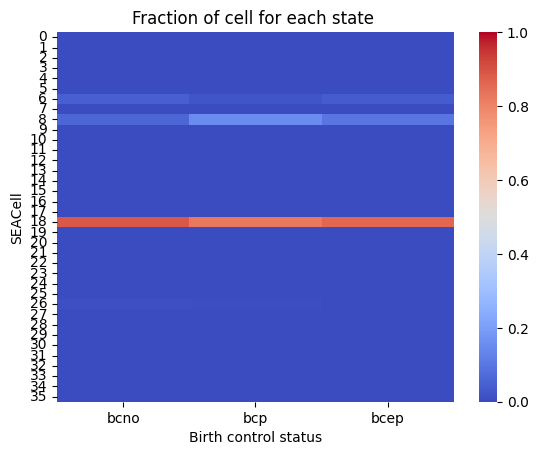

In [473]:
# plot heatmap with x axis as birth control status
plt.clf()
cell_fractions = np.vstack([bc_cell_fractions_mean[suff].values for suff in suffixes]).T
ax = sns.heatmap(cell_fractions, cmap = 'coolwarm', linewidth=0, yticklabels=True, vmin=0, vmax=1)
ax.set_xticklabels(suffixes)
ax.set_xlabel('Birth control status')
ax.set_ylabel('SEACell')
plt.title("Fraction of cell for each state ")
title = f'{save_dir}cell_fraction_plot_bc_{ref_name}_{model}{switch}{shift}'
plt.savefig(title, dpi=300, bbox_inches="tight")

In [474]:
# perform t-test between birth control status
scipy.stats.ttest_ind(bc_cell_fractions_mean["bcno"], bc_cell_fractions_mean["bcp"]), scipy.stats.ttest_ind(bc_cell_fractions_mean["bcno"], bc_cell_fractions_mean["bcep"]), scipy.stats.ttest_ind(bc_cell_fractions_mean["bcp"], bc_cell_fractions_mean["bcep"])

(TtestResult(statistic=0.0, pvalue=1.0, df=70.0),
 TtestResult(statistic=0.0, pvalue=1.0, df=70.0),
 TtestResult(statistic=0.0, pvalue=1.0, df=70.0))

### Compare Endometriosis cases

In [487]:
# read cell fractions
suffixes = ["case", "sus", "control"]
endo_cell_fractions = {}
for suff in suffixes:
	endo_cell_fractions[suff] = pd.read_csv(f'{results_dir}{bulk_dataset_name}_{suff}/{model}/cell_prob_{"2024-06-27"}_js{switch}{shift}.csv', index_col=0)
endo_cell_fractions.keys()

dict_keys(['case', 'sus', 'control'])

In [488]:
# for each cell fraction, average states 1 to 3
endo_cell_fractions_mean = {}
for suff in suffixes:
	endo_cell_fractions_mean[suff] = endo_cell_fractions[suff].iloc[:, 1:4].mean(axis=1)

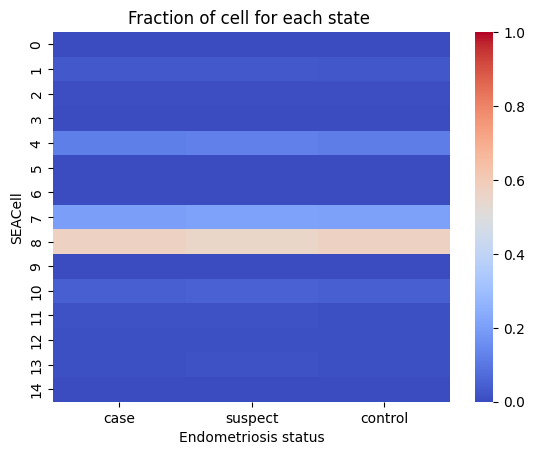

In [489]:
# plot heatmap with x axis as birth control status
plt.clf()
cell_fractions = np.vstack([endo_cell_fractions_mean[suff].values for suff in suffixes]).T
ax = sns.heatmap(cell_fractions, cmap = 'coolwarm', linewidth=0, yticklabels=True, vmin=0, vmax=1)
ax.set_xticklabels(["case", "suspect", "control"])
ax.set_xlabel('Endometriosis status')
ax.set_ylabel('SEACell')
plt.title("Fraction of cell for each state ")
title = f'{save_dir}cell_fraction_plot_endo_{ref_name}_{model}{switch}{shift}'
plt.savefig(title, dpi=300, bbox_inches="tight")

### Plot age progression for different endometriosis status

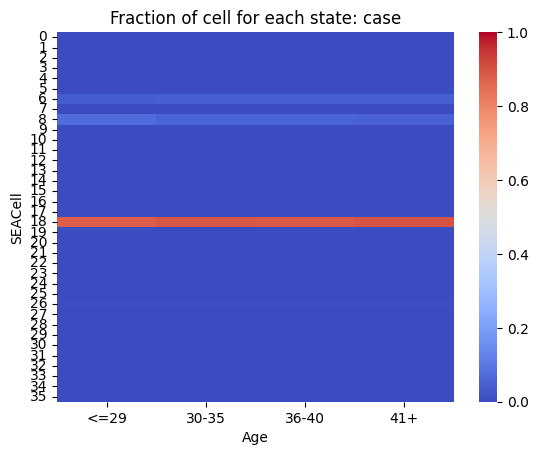

In [39]:
ages = [i for i in range(4)]
endos = [0, 0.5, 1]
endo_stat = ["control", "suspected", "case"]

for endo in endos:
	age_cell_fractions = {}
	for age in ages:
		age_cell_fractions[age] = pd.read_csv(f'{results_dir}{bulk_dataset_name}_endo{endo}_age{age}/{model}/cell_prob_{DATE}_js{switch}{shift}.csv', index_col=0)

	# for each cell fraction, average states 1 to 3
	age_cell_fractions_mean = {}
	for age in ages:
		age_cell_fractions_mean[age] = age_cell_fractions[age].iloc[:, :3].mean(axis=1)

	# plot heatmap with x axis as age
	plt.clf()
	cell_fractions = np.vstack([age_cell_fractions_mean[age].values for age in ages]).T
	ax = sns.heatmap(cell_fractions, cmap = 'coolwarm', linewidth=0, yticklabels=True, vmin=0, vmax=1)
	ax.set_xticklabels([f'{age}' for age in ["<=29", "30-35", "36-40", "41+"]])
	ax.set_xlabel('Age')
	ax.set_ylabel('SEACell')
	plt.title(f"Fraction of cell for each state: {endo_stat[int(endo*2)]}")
	title = f'{save_dir}cell_fraction_plot_age_endo{endo}_{ref_name}_{model}{switch}{shift}.png'
	plt.savefig(title, dpi=300, bbox_inches="tight")


In [47]:
ages = [i for i in range(4)]
endos = [0, 0.5, 1]
endo_stat = ["control", "suspected", "case"]

for endo in endos:
	age_cell_fractions = {}
	for age in ages:
		age_cell_fractions[age] = pd.read_csv(f'{results_dir}{bulk_dataset_name}_endo{endo}_age{age}/{model}/cell_prob_{DATE}_js{switch}{shift}.csv', index_col=0)

	# for each cell fraction, average states 1 to 3
	age_cell_fractions_mean = {}
	for age in ages:
		age_cell_fractions_mean[age] = age_cell_fractions[age].iloc[:, 1:4].mean(axis=1)

	cell_fractions = np.vstack([age_cell_fractions_mean[age].values for age in ages]).T

	# calculate correlation between age and cell fraction for each cell type
	correlations = []
	for i in range(cell_fractions.shape[0]):
		correlations.append(np.corrcoef(ages, cell_fractions[i, :])[0, 1])

	# print(correlations[6])

	# calculate p value
	p_values = []
	for i in range(cell_fractions.shape[0]):
		p_values.append(scipy.stats.pearsonr(ages, cell_fractions[i, :])[1])

	print(np.min(p_values), np.argmin(p_values))
	print(p_values[23], p_values[23])
	print(cell_fractions[23, :], cell_fractions[23, :])

0.056390974233635704 29
0.4489360085672893 0.4489360085672893
[1.09754671e-05 9.35843845e-06 7.86000251e-06 1.75512117e-05] [1.09754671e-05 9.35843845e-06 7.86000251e-06 1.75512117e-05]
0.037964697291852145 23
0.037964697291852145 0.037964697291852145
[6.43400272e-06 1.05780592e-05 1.90035947e-05 3.49975901e-05] [6.43400272e-06 1.05780592e-05 1.90035947e-05 3.49975901e-05]
0.0040920683443586015 23
0.0040920683443586015 0.0040920683443586015
[9.83108715e-06 1.07629215e-05 1.19301332e-05 1.33360529e-05] [9.83108715e-06 1.07629215e-05 1.19301332e-05 1.33360529e-05]


### Analyze results

In [186]:
ref_adata = anndata.AnnData(csr_matrix(ref_df.values))
ref_adata

AnnData object with n_obs × n_vars = 1905 × 489

In [187]:
ref_adata.obs_names = ref_df.index
ref_adata.var_names = ref_df.columns
ref_adata.obs['SEACell'] = ref_assign_df['SEACell']

/Users/CJChen/Desktop/PeerLab/probablistic-model/venv/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/CJChen/Desktop/PeerLab/probablistic-model/venv/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/CJChen/Desktop/PeerLab/probablistic-model/venv/lib/python3.11/site

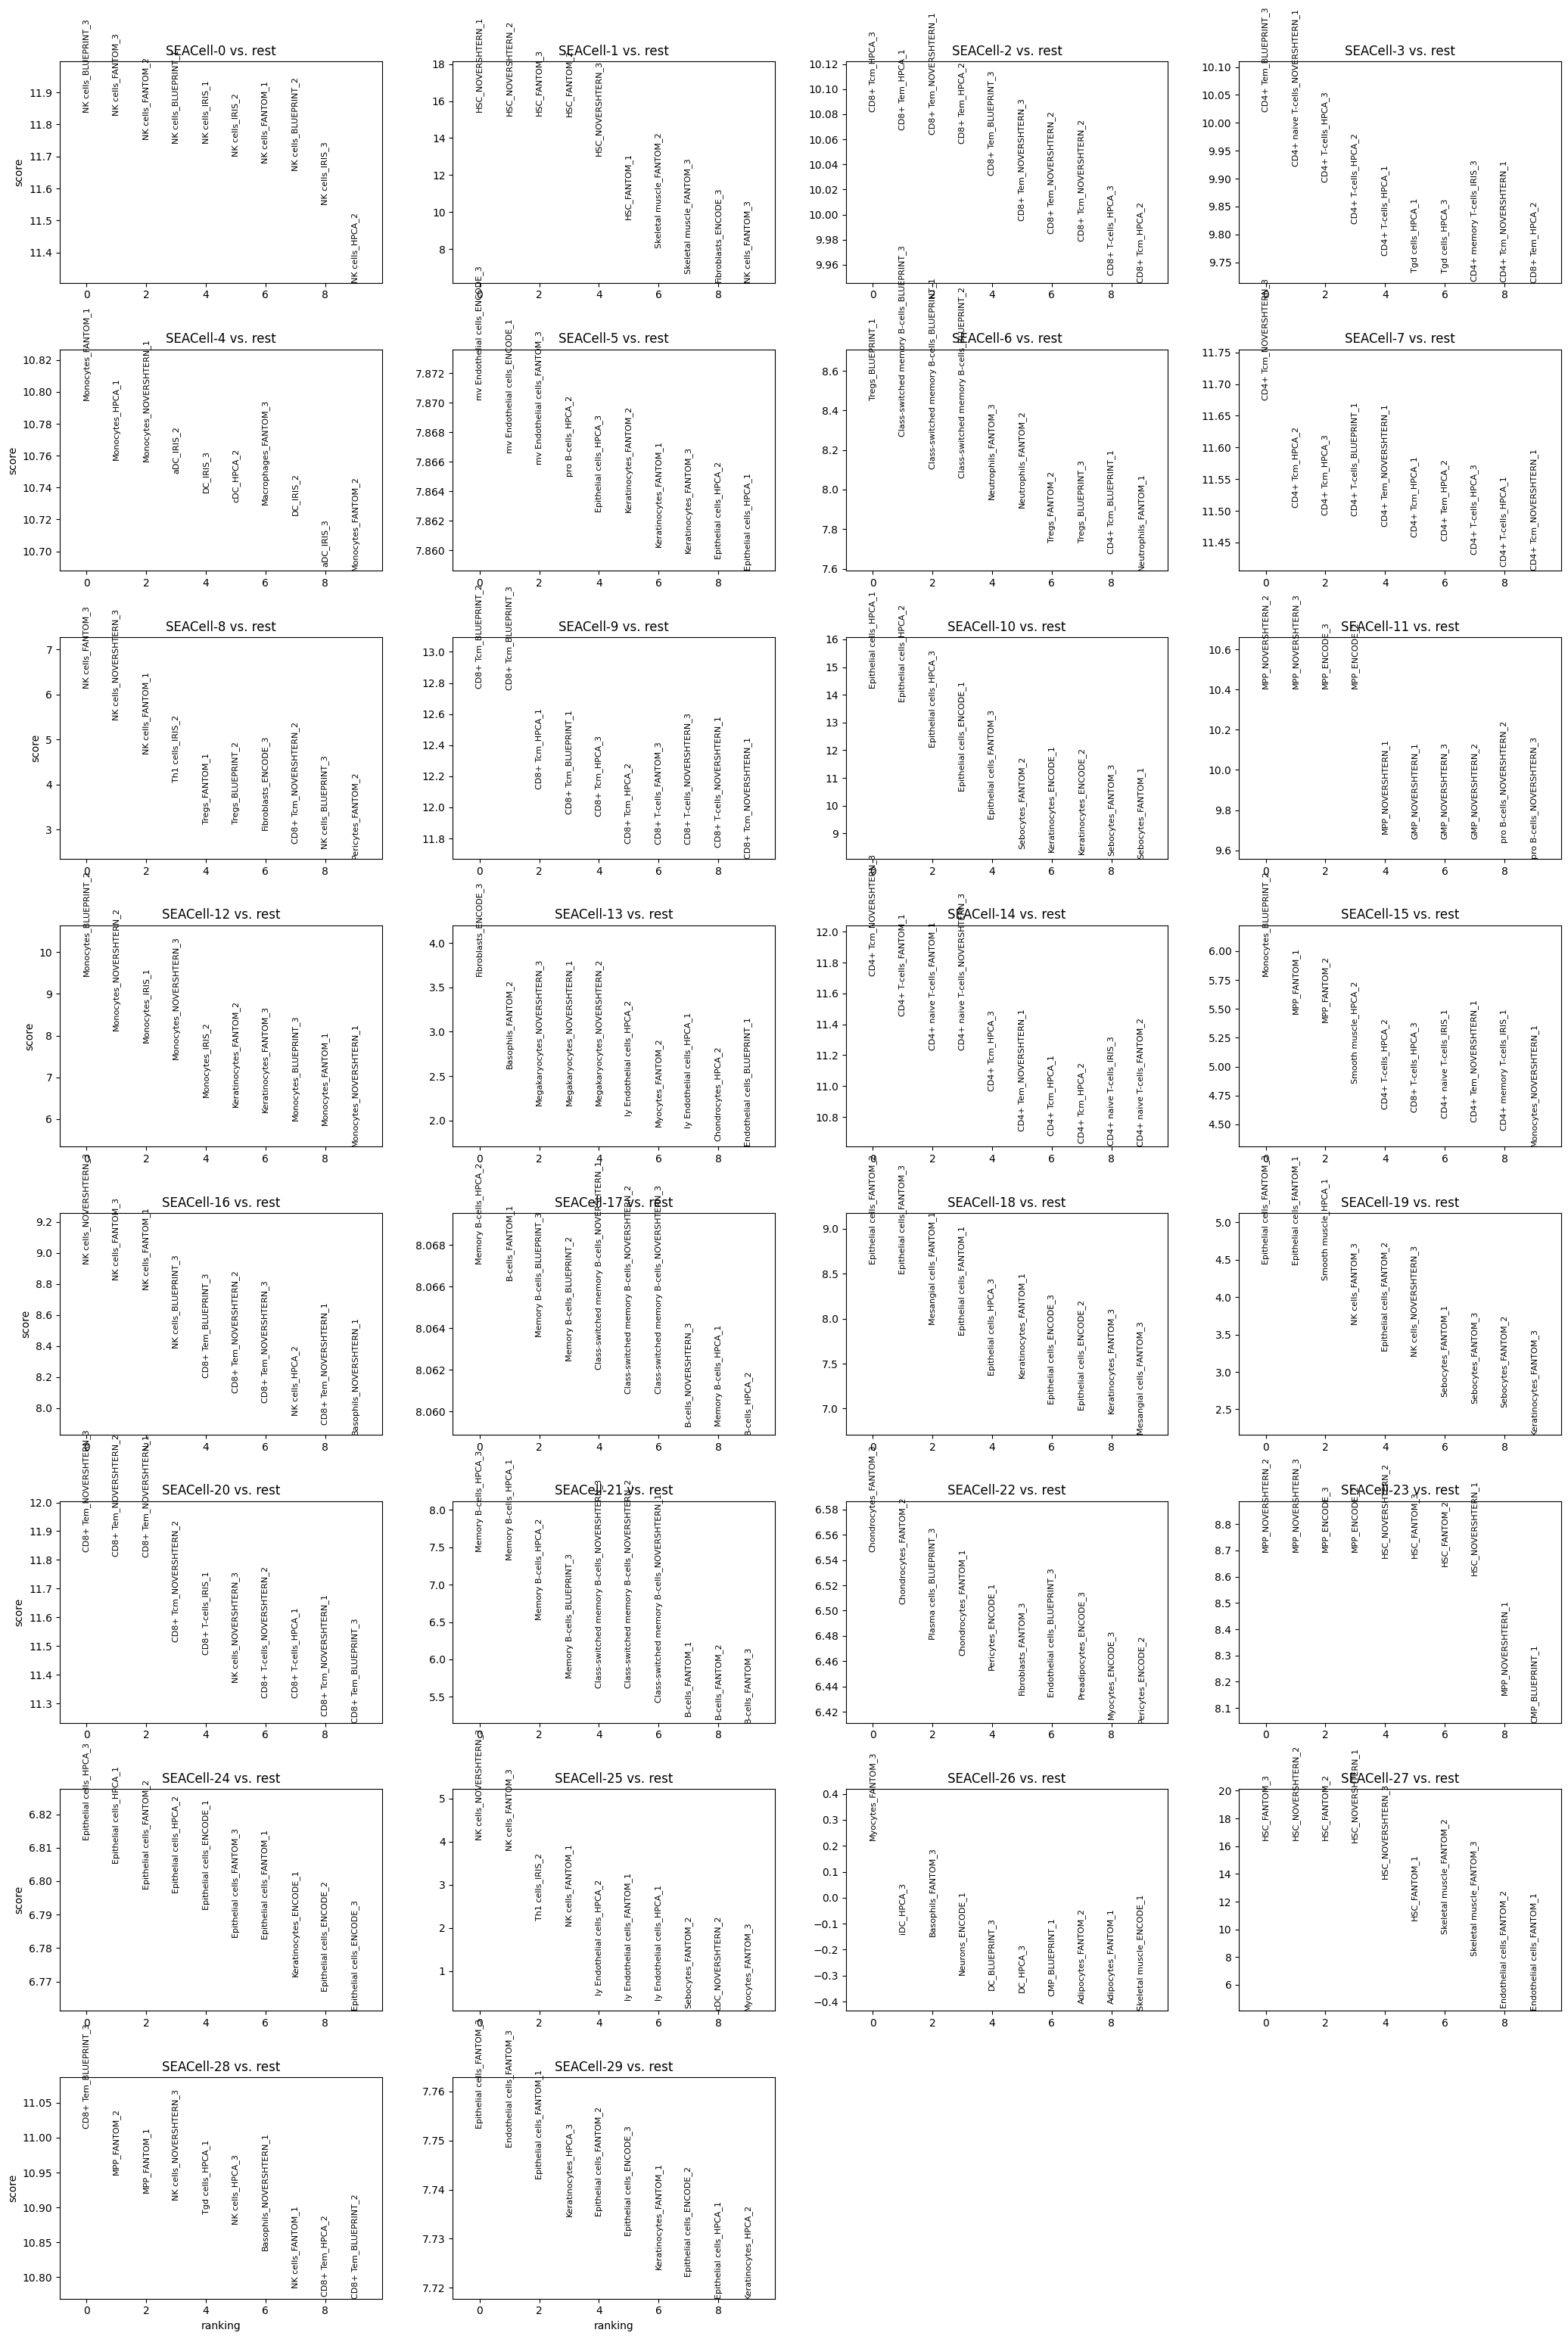

In [188]:
# rank genes
sc.tl.rank_genes_groups(ref_adata, 'SEACell', method='wilcoxon')
sc.pl.rank_genes_groups(ref_adata, n_genes=10, sharey=False, save=f'_{ref_name}_{model}{switch}{shift}.pdf')

In [189]:
df = []
for i in range(clusters_mean.shape[0]):
	cluster_name = "SEACell-{}".format(i)
	tmp = sc.get.rank_genes_groups_df(ref_adata, group=cluster_name).iloc[:10]
	tmp.insert(0, column="cluster", value=[cluster_name for _ in range(10)])
	df.append(tmp)
df = pd.concat(df)
df

,cluster,names,scores,logfoldchanges,pvals,pvals_adj
0,SEACell-0,NK cells_BLUEPRINT_3,11.837575,4.831759,2.495645e-32,6.973251e-30
1,SEACell-0,NK cells_FANTOM_3,11.826372,5.601349,2.852046e-32,6.973251e-30
2,SEACell-0,NK cells_FANTOM_2,11.751077,5.476576,6.972507e-32,7.713825e-30
3,SEACell-0,NK cells_BLUEPRINT_1,11.740655,4.490898,7.887346e-32,7.713825e-30
4,SEACell-0,NK cells_IRIS_1,11.740655,4.490898,7.887346e-32,7.713825e-30
...,...,...,...,...,...,...
5,SEACell-29,Epithelial cells_ENCODE_3,7.730551,4.816480,1.070822e-14,2.275062e-13
6,SEACell-29,Keratinocytes_FANTOM_1,7.723769,4.065338,1.129392e-14,2.275062e-13
7,SEACell-29,Epithelial cells_ENCODE_2,7.722174,6.061039,1.143624e-14,2.275062e-13
8,SEACell-29,Epithelial cells_HPCA_1,7.717786,9.803442,1.183681e-14,2.275062e-13


In [190]:
df.to_csv(f'{save_dir}rank_genes_groups_{ref_name}_{model}{switch}{shift}.csv', index=False)